# Lab Assignment 05
The objective of this lab assignment is to cluster customers of a telephone company (`data_lab_05.csv`) and evaluate the clusters found.

#### Instructions:
Complete each task and question by filling in the blanks (`...`) with one or more lines of code or text. Tasks 1-11 and questions 1-5 are worth **0.5 points** each and questions 6-7 are worth **1 point** each (out of **10 points**).

#### Submission:
This assignment is due **Monday, October 26, at 11:59PM (Central Time)**.

This assignment must be submitted on Gradescope as a **PDF file** containing the completed code for each task and the corresponding output. To save your Jupyter notebook as a PDF file, go to `File > Export Notebook As > HTML` or `File > Download As > HTML`, open the HTML file and print it as a PDF file. Additionally, this assignment has a single question on Gradescope and **all pages of the PDF file** must be assigned to this question. A **0.5-point (5%) penalty** will be applied to submissions that do not follow these guidelines. For more instructions on how to submit assignments on Gradescope, see this [guide](http://gradescope-static-assets.s3-us-west-2.amazonaws.com/help/submitting_hw_guide.pdf).

Late submissions will be accepted within **0-12**  hours after the deadline with a **0.5-point (5%) penalty** and within **12-24** hours after the deadline with a **2-point (20%) penalty**. No late submissions will be accepted more than 24 hours after the deadline.

**This assignment is individual**. Offering or receiving any kind of unauthorized or unacknowledged assistance is a violation of the University’s academic integrity policies, will result in a grade of zero for the assignment, and will be subject to disciplinary action.

### Part 1: Data Preparation

In [39]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler  
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn import metrics

In [40]:
# Load dataset and display the first five rows
data = pd.read_csv('data_lab_05.csv')
data.head()

,Account length,International plan,Voice mail plan,Number voice mail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


**Task 01 (of 11): Create a new numerical attribute named 'Total charge' that contains the sum of the attributes 'Total day charge', 'Total eve charge', and 'Total night charge'.**

In [41]:
data['Total charge'] = data['Total day charge'] + data['Total eve charge'] + data['Total night charge']

In [42]:
# Partition the dataset into attributes and true clusters (churned/non-churned)
# Consider only the following attributes: 'International plan', 'Total charge', and 'Customer service calls'
X = data[['International plan', 'Total charge', 'Customer service calls']]
Y = data['Churn']

**Task 02 (of 11): Standardize the attributes.**

In [43]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

### Part 2: Hierarchical Clustering

**Task 03 (of 11): Cluster the dataset using hierarchical clustering with single linkage method.
Use single linkage as the method and Euclidean distance as the distance metric.**

In [44]:
clustering = linkage(X_scaled, method='single', metric='euclidean')
clusters = fcluster(clustering, 2, criterion = 'maxclust')

**Task 04 (of 11): Plot contingency matrix and compute evaluation metrics for hierarchical clustering with single linkage method.**

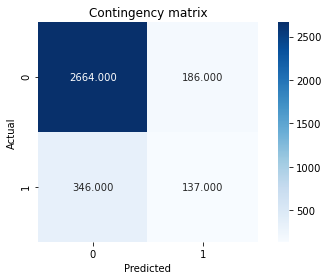

In [45]:
cont_matrix = metrics.cluster.contingency_matrix(data['Churn'], clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [46]:
adjusted_rand_index = metrics.adjusted_rand_score(data['Churn'], clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaled, clusters, metric='euclidean')
print([adjusted_rand_index, silhouette_coefficient])

[0.201747491556069, 0.5588810706001527]


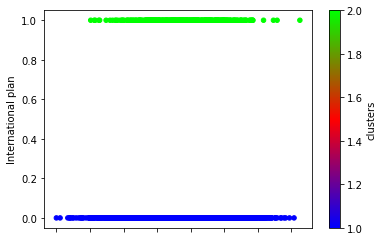

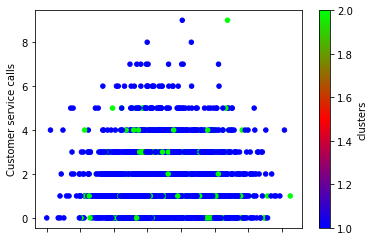

In [47]:
# Plot clusters found using hierarchical clustering with single linkage method
data['clusters'] = clusters
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'International plan', c = 'clusters', colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'Customer service calls', c = 'clusters', colormap = plt.cm.brg)

**Question 01 (of 07): What can you conclude about the clusters found using hierarchical clustering with single linkage method from the plot and the evaluation metrics?**

**Answer:** There is a obviously separation that split international plan into two clusters. But for the Customer service calls, it seems two clusters mixed and no division of these clusters

The adjusted rand index tells us that single linkage does not clustering the observation well, and sihuotte coefficient tells us there is about the average quality in terms of cohesion and seperation

**Task 05 (of 11): Cluster the dataset using hierarchical clustering with complete linkage method.
Use complete linkage as the method and Euclidean distance as the distance metric.**

In [48]:
clustering = linkage(X_scaled, method='complete', metric='euclidean')
clusters = fcluster(clustering, 2, criterion = 'maxclust')

**Task 06 (of 11): Plot contingency matrix and compute evaluation metrics for hierarchical clustering with complete linkage method.**

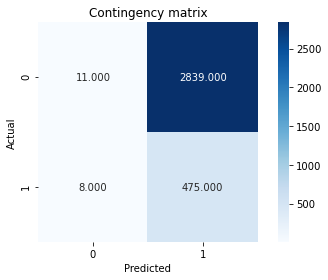

In [49]:
cont_matrix = metrics.cluster.contingency_matrix(data['Churn'], clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [50]:
adjusted_rand_index = metrics.adjusted_rand_score(data['Churn'], clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaled, clusters, metric='euclidean')
print([adjusted_rand_index, silhouette_coefficient])

[0.017507021065270037, 0.5130278392459514]


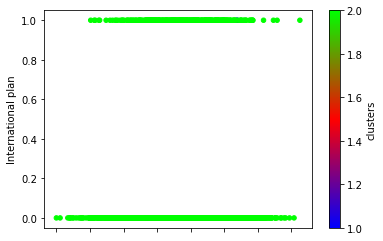

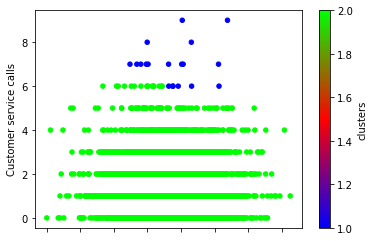

In [51]:
# Plot clusters found using hierarchical clustering with complete linkage method
data['clusters'] = clusters
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'International plan', c = 'clusters', colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'Customer service calls', c = 'clusters', colormap = plt.cm.brg)

**Question 02 (of 07): What can you conclude about the clusters found using hierarchical clustering with complete linkage method from the plot and the evaluation metrics?**

**Answer:** There is only one cluster for international plan, so the complete linkage does not work well for International pan. But for the Customer service calls, it seems two clusters are being split well, because we can see there is a obviously separation

The adjusted rand index is very low, it tells us that complete linkage does not clustering the observation NOT well, and sihuotte coefficient tells us there is about the average quality in terms of cohesion and seperation

### Part 3: K-Means Clustering

**Task 07 (of 11): Cluster the dataset using K-Means clustering.
Use random initialization of centroids, 10 iterations, and set parameter `random_state` to 0.**

In [52]:
clustering = KMeans(n_clusters=2, init='random', n_init=10, random_state=0).fit(X_scaled)
clusters = clustering.labels_

**Task 08 (of 11): Plot contingency matrix and compute evaluation metrics for K-Means clustering.**

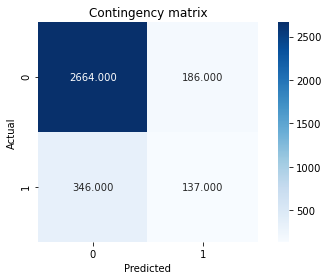

In [53]:
cont_matrix = metrics.cluster.contingency_matrix(data['Churn'], clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [54]:
adjusted_rand_index = metrics.adjusted_rand_score(data['Churn'], clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaled, clusters, metric='euclidean')
print([adjusted_rand_index, silhouette_coefficient])

[0.201747491556069, 0.5588810706001527]


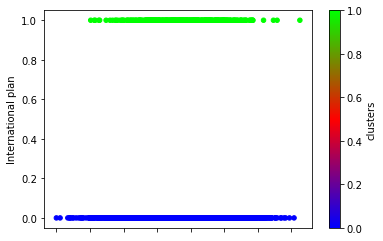

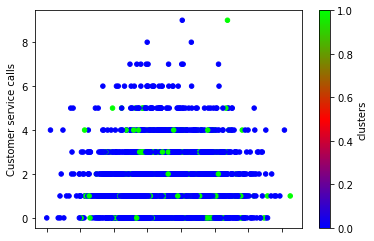

In [55]:
# Plot clusters found using K-Means clustering
data['clusters'] = clusters
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'International plan', c = 'clusters', colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'Customer service calls', c = 'clusters', colormap = plt.cm.brg)
# ax.set(title = 'iris data', xlabel = 'petal width', ylabel = 'petal length')

**Question 03 (of 07): What can you conclude about the clusters found using K-Means clustering from the plot and the evaluation metrics?**

**Answer:** There is a obviously separation that split international plan into two clusters. But for the Customer service calls, it seems two clusters mixed and no division of these clusters

The adjusted rand index tells us that single linkage does not clustering the observation well, and sihuotte coefficient tells us there is about the average quality in terms of cohesion and seperation

### Part 4: DBSCAN

**Task 09 (of 11): Cluster the dataset using DBSCAN.
Use parameters `Eps=2`, `MinPts=5`, and Euclidean distance as the distance metric.**

In [56]:
clustering = DBSCAN(eps=2, min_samples=5, metric='euclidean').fit(X_scaled)
clusters = clustering.labels_

**Task 10 (of 11): Plot contingency matrix and compute evaluation metrics for DBSCAN.**

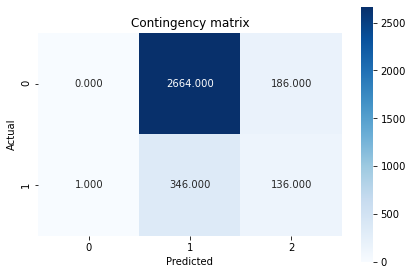

In [57]:
cont_matrix = metrics.cluster.contingency_matrix(data['Churn'], clusters)
sns.heatmap(cont_matrix, annot = True, fmt = ".3f", square = True, cmap = plt.cm.Blues)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Contingency matrix')
plt.tight_layout()

In [58]:
adjusted_rand_index = metrics.adjusted_rand_score(data['Churn'], clusters)
silhouette_coefficient = metrics.silhouette_score(X_scaled, clusters, metric='euclidean')
print([adjusted_rand_index, silhouette_coefficient])

[0.20184369179051267, 0.556193882912843]


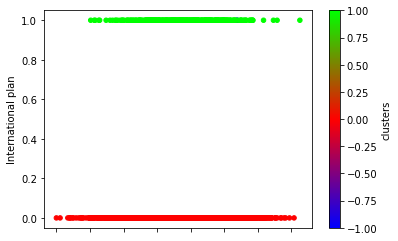

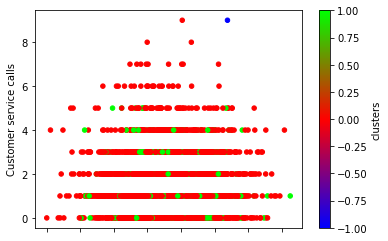

In [59]:
# Plot clusters found using DBSCAN
data['clusters'] = clusters
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'International plan', c = 'clusters', colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'Customer service calls', c = 'clusters', colormap = plt.cm.brg)
# ax.set(title = 'iris data', xlabel = 'petal width', ylabel = 'petal length')

**Question 04 (of 07): How many clusters were found using DBSCAN?**

**Answer:** 3, one blue point at the top right corner

**Question 05 (of 07): What can you conclude about the clusters found using DBSCAN from the plot and the evaluation metrics?**

**Answer:** There is a obviously separation that split international plan into two clusters. But for the Customer service calls, it seems three clusters mixed and no division of these clusters

The adjusted rand index tells us that single linkage does not clustering the observation well, and sihuotte coefficient tells us there is about the average quality in terms of cohesion and seperation

**Question 06 (of 07): Which of the clustering techniques had the best performance?**

**Answer:** K-Mean and single linkage had the best performance, their adjusted_rand_index is about 0.2 and silhouette_coefficient is 0.5 it tells us K-Mean and single linkage does clustering the observation well.
Based on their plots, they had better performance of divided the observations

**Task 11 (of 11): Compute evaluation metrics for the true clusters of the data (churned/non-churned).**

In [60]:
silhouette_coefficient = metrics.silhouette_score(X_scaled, data['Churn'], metric='euclidean')
print(silhouette_coefficient)

0.29452252272489277


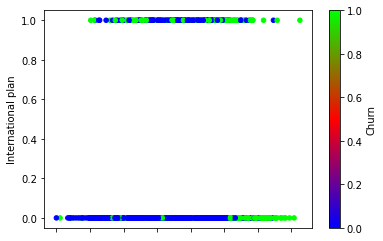

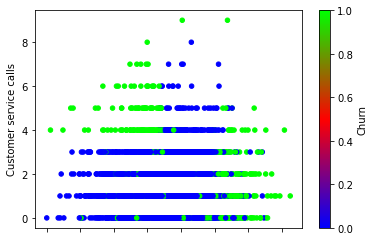

In [61]:
# Plot true clusters (churned/non-churned)
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'International plan', c = 'Churn', colormap = plt.cm.brg)
ax = data.plot(kind = 'scatter', x = 'Total charge', y = 'Customer service calls', c = 'Churn', colormap = plt.cm.brg)

**Question 07 (of 07): What can you conclude about the true clusters of the data from the plot and the evaluation metrics?**

**Answer:** Based on silhouette_coefficient about 0.29, for the orinial clusting there is about the average quality in terms of cohesion and seperation. Based on the plots, the second plot seems performance a better division of clustering